In [1]:
import	tensorflow
from	tensorflow	import	keras
from	tensorflow.keras	import	Sequential
from	keras.layers	import	Dense,Flatten

In [2]:
#	mnist	dataset	is	very	famous	dataset	thats	why	it	is	already	in	keras	library	and	used	that
(X_train,y_train),(X_test,y_test)	=	keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[10].shape

(28, 28)

In [5]:
import	numpy	as	np
import	pandas	as	pd
import	seaborn	as	sns
import	matplotlib.pyplot	as	plt

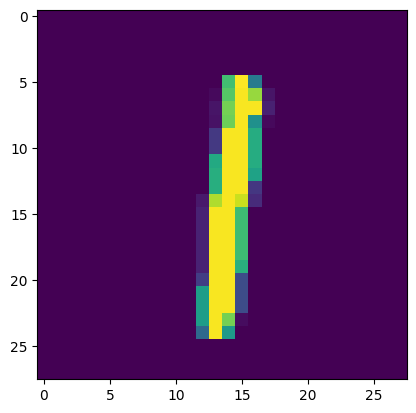

In [6]:
plt.imshow(X_train[40])

In [7]:
X_train	=	X_train/255
X_test	=	X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model	=	Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history	=	model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 9s 4ms/step - loss: 0.2898 - accuracy: 0.9170 - val_loss: 0.1467 - val_accuracy: 0.9568
Epoch 2/100
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1211 - accuracy: 0.9632 - val_loss: 0.1131 - val_accuracy: 0.9649
Epoch 3/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0825 - accuracy: 0.9742 - val_loss: 0.1146 - val_accuracy: 0.9635
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0622 - accuracy: 0.9811 - val_loss: 0.0908 - val_accuracy: 0.9729
Epoch 5/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0481 - accuracy: 0.9848 - val_loss: 0.1028 - val_accuracy: 0.9703
Epoch 6/100
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.1055 - val_accuracy: 0.9688
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.1084 - va

In [12]:
model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[7.7612667e-36, 1.6762861e-26, 1.4232000e-25, ..., 1.0000000e+00,
        3.8386928e-28, 4.4743484e-28],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        4.7147566e-30, 0.0000000e+00],
       [1.6820913e-24, 1.0000000e+00, 1.4803977e-23, ..., 7.6565062e-17,
        4.0171175e-10, 1.9348545e-34],
       ...,
       [0.0000000e+00, 1.7511897e-37, 0.0000000e+00, ..., 4.4051401e-24,
        6.3641524e-23, 1.2135753e-27],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.9354738e-34,
        1.1347940e-27, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [13]:
y_prob	=	model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [14]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
y_pred	=	y_prob.argmax(axis=1)

In [16]:
from	sklearn.metrics	import	accuracy_score
accuracy_score(y_test,y_pred)

0.9752

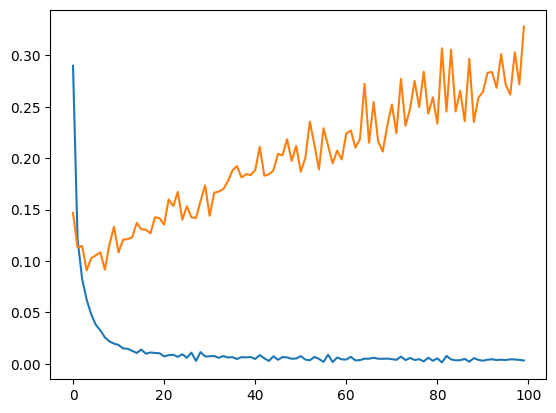

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

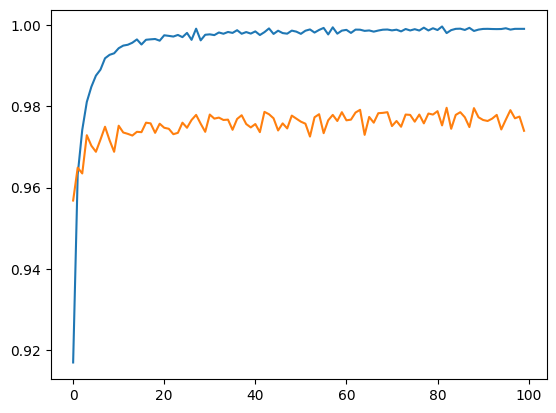

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

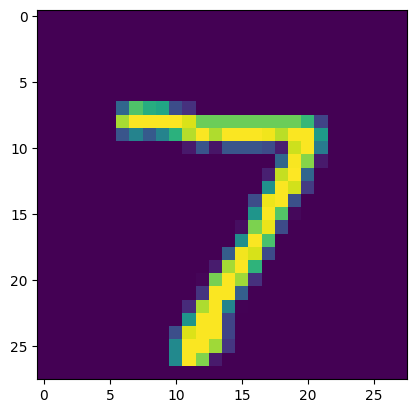

In [19]:
plt.imshow(X_test[0])

In [20]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 42ms/step


array([7])

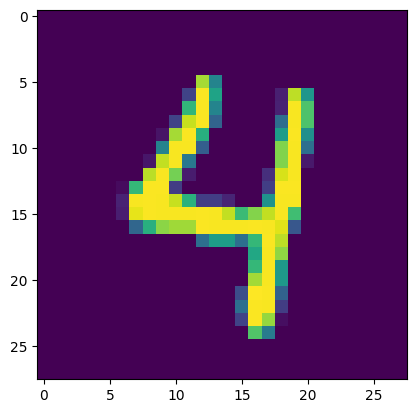

In [21]:
plt.imshow(X_test[27])

In [22]:
model.predict(X_test[27].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([4])